# url: https://smart-hint.com/ml/tree/

# 【機械学習】決定木のPython実践・可視化｜Decision Tree

## 決定木とは？
今回はPythonで実施する「決定木（Decision tree）」について実践していきます

決定木とは分類・判別のために作られるツリー構造を用いて、予測を行う機械学習の一つです

例えば「機械学習を学ぶ人」を予測するときに、「職種」と「勉強が好きかどうか」で決定木を作ります

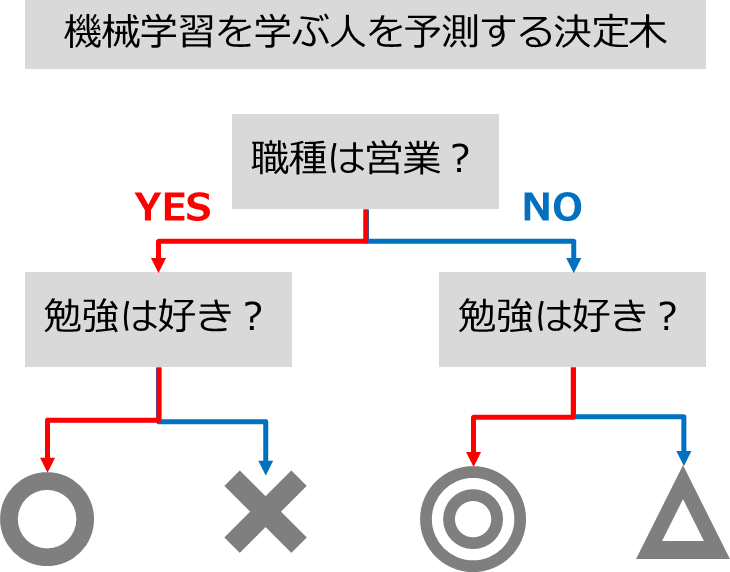

職種が営業ではない（NO）で、勉強が好き（YES）な人が機械学習を学ぶ確率が高くなるはずです（◎）

機械学習の決定木では、「職種」や「勉強が好きか」といったデータを入れることで、

AIモデルが自動的にツリー構造を作成してくれます

## 決定木を使うメリット
決定木のモデルを使うメリットはずばり「可読性＝分かりやすさ」です

他の機械学習モデルは中身がブラックボックス（どういう仕組みか分からない）になっていることが多いです

予測はしてくれるけど、どうしてその結果になったか分からなくなります

その点、決定木のモデルではプロセスをツリー構造で可視化することができます

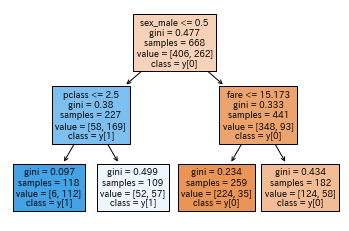

## 決定木を使うデメリット
決定木は可読性が高いメリットがある一方で、予測の精度を求められるケースではほとんど利用されません

利用されない理由は、決定木を組み合わせた「ランダムフォレスト」の方が精度が高いためです

その名の通りランダムフォレストは、決定木をいくつか組み合わせたモデルで上位互換となります

登場する機会は少ないですが、決定木の仕組みを知らないと他の上位モデルを使いこなせないため、感覚をつかむ目的で使ってみてください

## 事前準備
Seabornから、タイタニック号のデータを取得しておきます

またPandas/ sklearnも合わせてインポートしておきます

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 決定木の前処理
### 説明変数（x）と目的変数（y）に分割
事前に定義したタイタニック号のデータの変数（df）から、説明変数（df_x）と目的変数（df_y）に分けます

決定木の可視化を見やすくするために、性別・チケットクラス・運賃に限定します

In [2]:
df_x = df[['sex','pclass','fare']]
df_y = df['survived']

## ダミー変数処理（文字列→数値）
続いて性別のカラムには「male・female」の文字列が格納されているため、数値列に変換します

get_dummiesを使うと簡単に変換を行えます

またパラメータのdrop_firstを使うことで、カラム数を減らすことができます



In [3]:
df_x = pd.get_dummies(df_x, drop_first=True)

## 学習用-テスト用に分割
train_test_splitを使って、学習用とテスト用にデータを分割します



In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state=1)

## 決定木モデルの作成と予測
決定木（tree）のモデルを作成します

※パラメータは後述します

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2, random_state=1)

上記で前処理を実施したデータをfitメソッドで学習を行います

In [6]:
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2, random_state=1)

モデルに対してpredictで予測を実施します

In [7]:
model.predict(test_x)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

scoreメソッドでスコア（正解率）を算出することができます

In [8]:
model.score(test_x,test_y)

0.7533632286995515

パラメータ：max_depth（最大深度）

max_depthはツリーの最大深度を示しており、条件をどのくらい分岐させるかを設定できます

分かりやすさが売りの決定木ですので、最低限の数値を設定しましょう

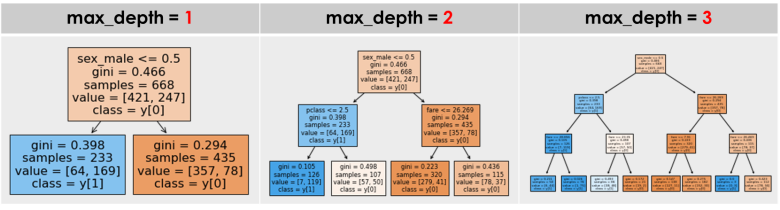

## 決定木の可視化（plot_tree）

上記で設定した決定木モデルはツリー構造として可視化することができます

plot_treeを使って、決定木のモデルを指定しましょう

[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]\nclass = y[0]'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.398\nsamples = 233\nvalue = [64, 169]\nclass = y[1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = y[1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 107\nvalue = [57, 50]\nclass = y[0]'),
 Text(0.75, 0.5, 'fare <= 26.269\ngini = 0.294\nsamples = 435\nvalue = [357, 78]\nclass = y[0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.223\nsamples = 320\nvalue = [279, 41]\nclass = y[0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.436\nsamples = 115\nvalue = [78, 37]\nclass = y[0]')]

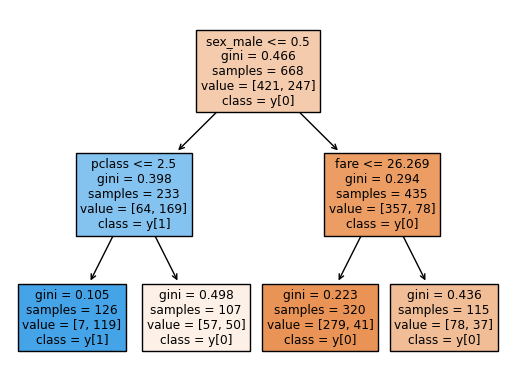

In [9]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=train_x.columns, class_names=True, filled=True)

## ツリーの見方

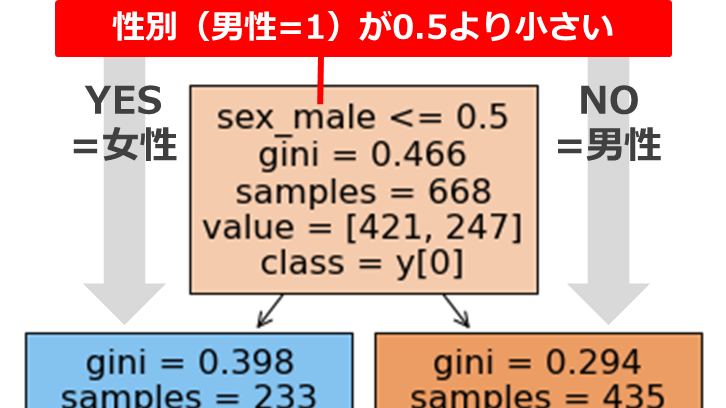

決定木のツリーは説明変数に条件を付けて下に分岐を行っていきます

例えば最初の「sex_male <= 0.5」は、男性の性別を「1」としているカラムに対して「0.5以下」の条件を付けています

つまり「女性」なら左へ、「男性」なら右へ分岐することを示しています

giniジニ係数は不純度と呼ばれており、各葉（ノード）にどのくらい間違いが含まれているかを示しています

不純度が最も低ければ（正しい）の値は「0」となり、不純度が高く（間違い）なればなるほどが「1」に近づきます

色合いは予測する目的変数を示しており、色が濃ければ濃いほどその目的変数に近いことを表しています（ジニ係数も低い）

samplesはその葉（ノード）の個数を、valueはその条件に当てはまる数を示しています

## パラメータ：説明変数の名前（feature_names）
feature_namesはツリー構造の説明変数の名称です

手動で指定するより、事前に作った変数（train_x）のcolumnsを指定しましょう

## パラメータ：目的変数の名前（class_names）
class_namesは目的変数（class）の名称です

こちらは単純に「True」と指定すれば大丈夫です

## パラメータ：色（filled）
filledを「True」とすることで、葉っぱに色を付けることができます

「False」か指定が無い場合は、すべて白になります

## まとめ
今回は機械学習の分類タスクで利用される決定木についてご説明してきました

機械学習の中でも人間に理解しやすいモデルのため、ぜひマーケティングなどに活用してみてください

基本の決定木を理解してしまえば、その上位互換の「ランダムフォレスト」や「LightGBM」、「XGBoost」も活用することができます